In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [2]:
#reading data
df = pd.read_csv('prices-split-adjusted.csv', index_col=0)
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


There are multiple variables in the dataset – date, open, high, low, close.

* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
* High, Low represent the maximum, minimum price of the share for the day.

Another important thing to note is that the market is closed on weekends and public holidays.

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

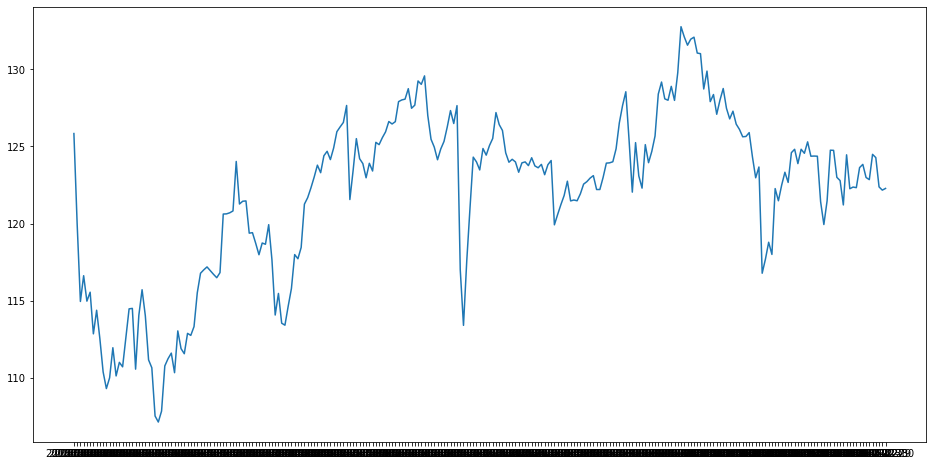

In [18]:
plt.figure(figsize=(16,8))

df1 = df[df.symbol=='WLTW']
plt.plot(df1['close'], label='Close Price History')

In [13]:
#creating dataframe with date and the target variable
#new_df = pd.DataFrame(index=range(0,len(df)), columns=['date','close'])

#for i in range(len(df)):
#    new_df['close'][i] = df['close'][i]

In [19]:
new_df = df1['close']
new_df.columns = ['close']

In [20]:
new_df = new_df.reset_index()

In [21]:
new_df.head()

,date,close
0,2016-01-05,125.839996
1,2016-01-06,119.980003
2,2016-01-07,114.949997
3,2016-01-08,116.620003
4,2016-01-11,114.970001


In [22]:
new_df.tail()

,date,close
246,2016-12-23,124.489998
247,2016-12-27,124.279999
248,2016-12-28,122.379997
249,2016-12-29,122.169998
250,2016-12-30,122.279999


In [24]:
train = new_df[:200]
valid = new_df[200:]

print('Shape of training set:', train.shape)
print('Shape of validation set:', valid.shape)

Shape of training set: (200, 2)
Shape of validation set: (51, 2)


In [25]:
preds=[]

for i in range(0,valid.shape[0]):
    a = train['close'][len(train)-51+i:].sum() + sum(preds)
    b = a/51
    preds.append(b)

In [27]:
#checking RMSE values
rmse = np.sqrt(np.mean(np.power((np.array(valid['close'])-preds), 2)))
print("RMSE: ", rmse)

RMSE:  4.746552518199128


c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


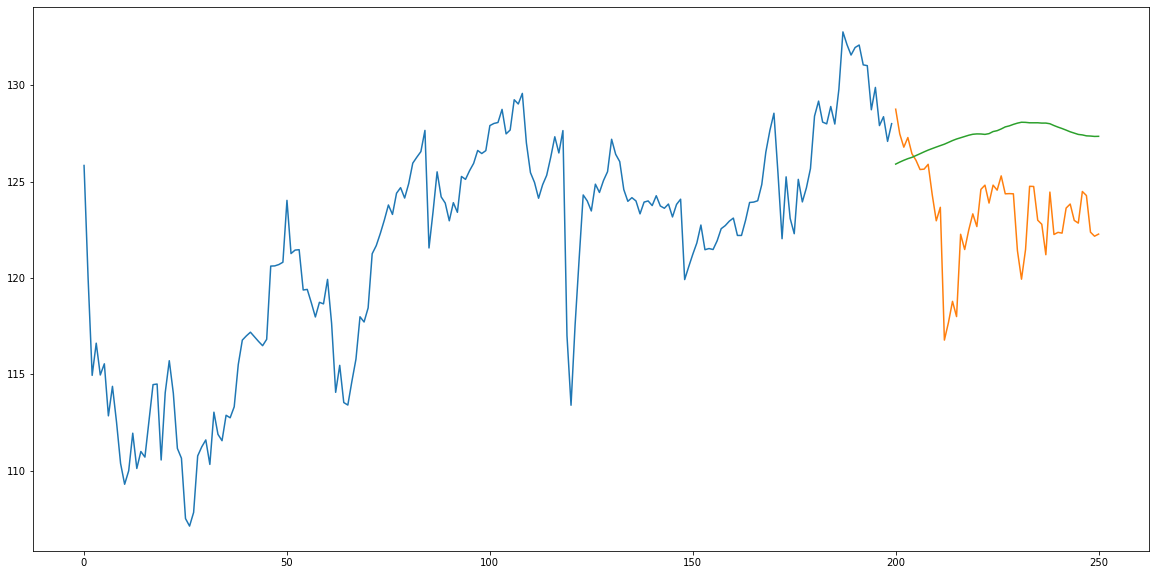

In [29]:
#plot it
valid['predictions'] = 0
valid['predictions'] =  preds
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])

Commonly used machine learning techniques on stock market data.
* Linear Regression
* kNN

Use the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.

In [31]:
new_df['date'] = pd.to_datetime(new_df['date'], format="%Y-%m-%d")
new_df.index = new_df.date

#sorting
data = new_df.sort_index(ascending=True, axis=0)

In [36]:
# creating features
from fastai.tabular import add_datepart
add_datepart(data, 'date')
data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

This creates features such as:

‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

* feature that identifies whether a given day is Monday/Friday or Tuesday/Wednesday/Thursday

In [37]:
data['mon_fri'] = 0
for i in range(0,len(data)):
    if (data['Dayofweek'][i] == 0 or data['Dayofweek'][i] == 4):
        data['mon_fri'][i] = 1
    else:
        data['mon_fri'][i] = 0

c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
data.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
date,,,,,,,,,,,,,,
2016-01-05,125.839996,2016,1,1,5,1,5,False,False,False,False,False,False,0
2016-01-06,119.980003,2016,1,1,6,2,6,False,False,False,False,False,False,0
2016-01-07,114.949997,2016,1,1,7,3,7,False,False,False,False,False,False,0
2016-01-08,116.620003,2016,1,1,8,4,8,False,False,False,False,False,False,1
2016-01-11,114.970001,2016,1,2,11,0,11,False,False,False,False,False,False,1


In [39]:
data.shape

(251, 14)

In [48]:
#split into train and validation
train = data[:200]
valid = data[200:]

x_train = train.drop('close', axis=1)
y_train = train['close']
x_valid = valid.drop('close', axis=1)
y_valid = valid['close']

In [49]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rmse = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rmse

7.178615464573281

The RMSE value is higher than the previous technique, which clearly shows that linear regression has performed poorly. Let’s look at the plot and understand why linear regression has not done well:

c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


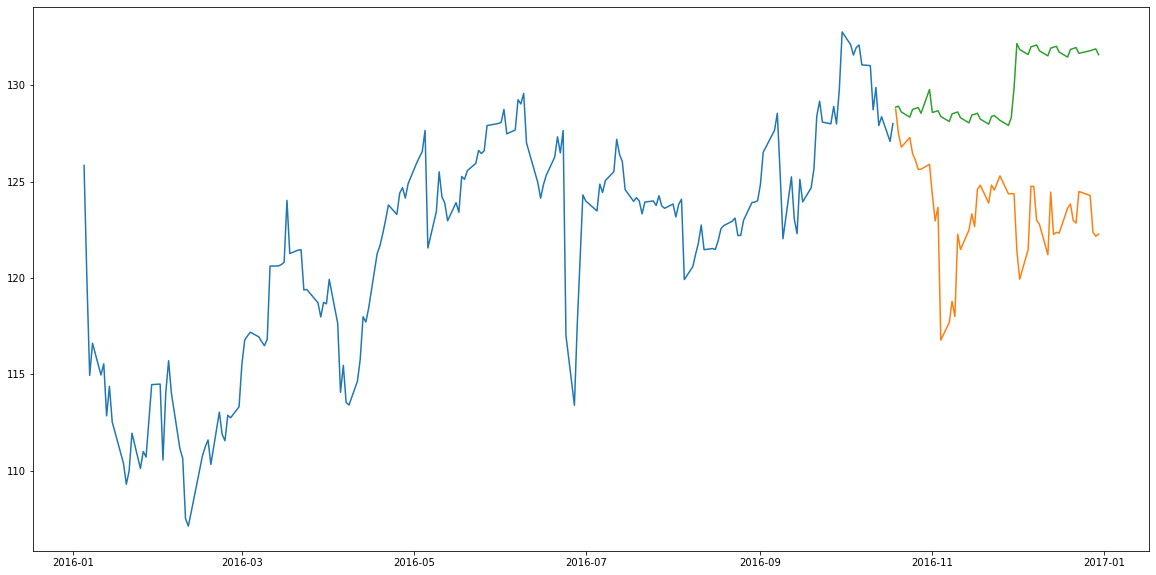

In [51]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = data[200:].index
train.index = data[:200].index

plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])

Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. One problem in using regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same date a month ago, or the same date/month a year ago.

## KNN

In [53]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [54]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [55]:
#rmse
rmse = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rmse

5.9347671441770595

c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


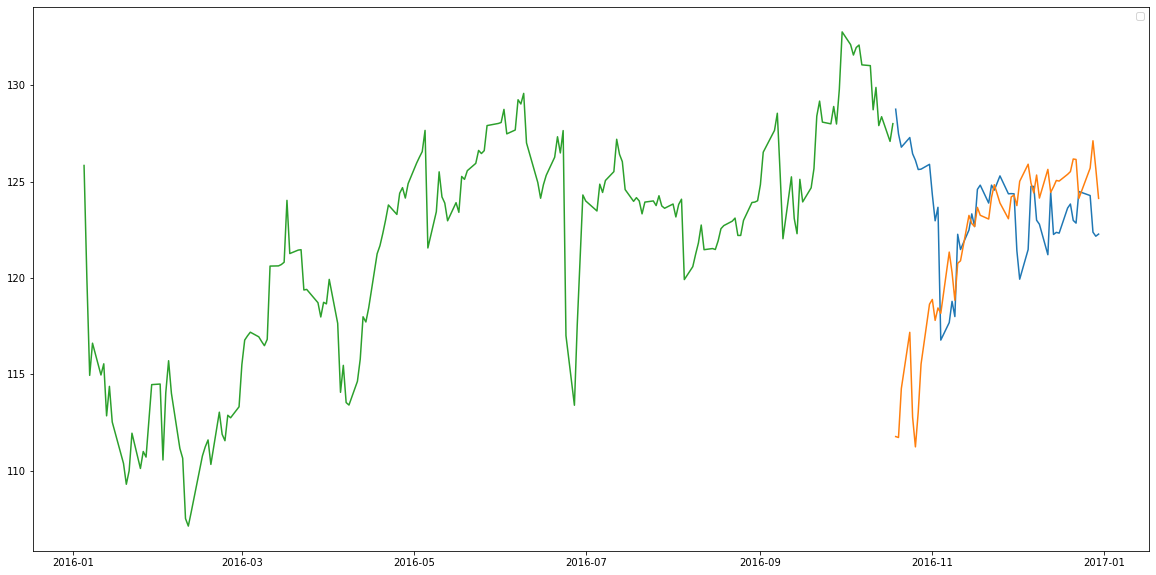

In [57]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['close', 'Predictions']])
plt.plot(train['close'])
plt.legend()

Let’s look at some time series forecasting techniques to find out how they perform when faced with this stock prices prediction.

## Auto ARIMA

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

* p (past values used for forecasting the next value)
* q (past forecast errors used to predict the future values)
* d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

In [58]:
from pmdarima.arima import auto_arima

train = data[:200]
valid = data[200:]

training = train['close']
validation = valid['close']

In [60]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',
                   suppress_warnings=True)

model.fit(training)

forecast = model.predict(n_periods=51)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=788.507, BIC=804.662, Time=2.263 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=887.506, BIC=893.968, Time=0.044 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=824.959, BIC=837.883, Time=0.692 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=788.000, BIC=800.924, Time=1.137 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=885.573, BIC=888.804, Time=0.092 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=883.861, BIC=896.785, Time=0.732 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=789.387, BIC=808.774, Time=2.011 seconds
N

In [62]:
rmse=np.sqrt(np.mean(np.power((np.array(valid['close'])-np.array(forecast['Prediction'])),2)))
rmse

10.663274170185751

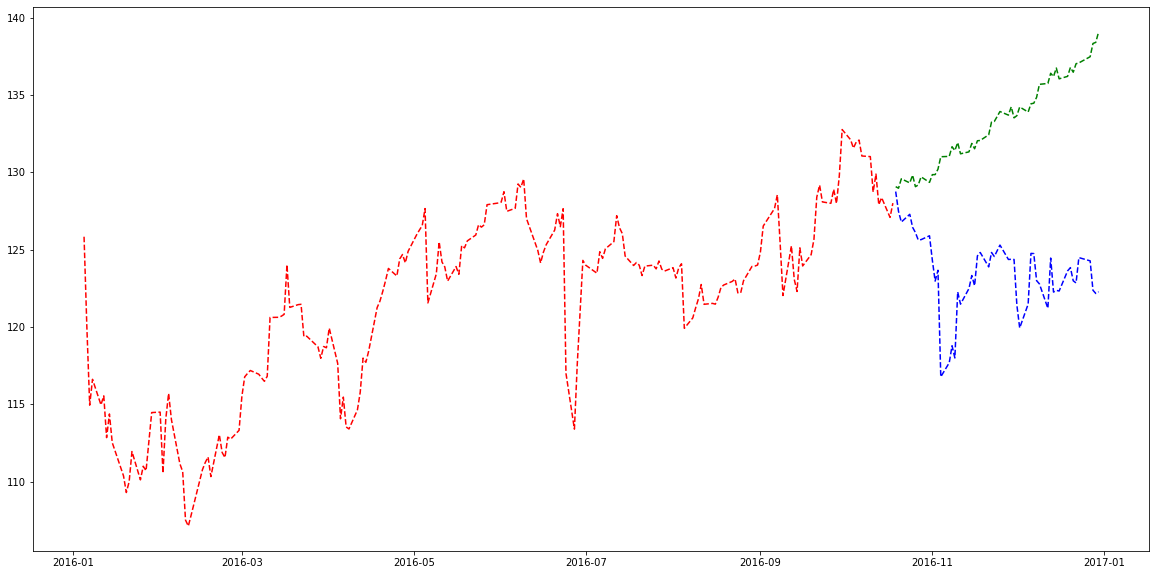

In [66]:
#plot
plt.plot(train['close'],'r--')
plt.plot(valid['close'],'b--')
plt.plot(forecast['Prediction'],'g--')

The model has captured a trend in the series, but does not focus on the seasonal part. We have to implement a time series model that takes both trend and seasonality of a series into account.

## Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

* The input gate: The input gate adds information to the cell state
* The forget gate: It removes the information that is no longer required by the model
* The output gate: Output Gate at LSTM selects the information to be shown as output

In [67]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [73]:
new_df.head()

,date,close
date,,
2016-01-05,2016-01-05,125.839996
2016-01-06,2016-01-06,119.980003
2016-01-07,2016-01-07,114.949997
2016-01-08,2016-01-08,116.620003
2016-01-11,2016-01-11,114.970001


In [75]:
dataset = new_df.drop('date', axis=1)

In [76]:
#creating train and test sets
dataset = dataset.values

train = dataset[0:200,:]
valid = dataset[200:,:]

In [77]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [78]:
x_train, y_train = [], []
for i in range(50,len(train)):
    x_train.append(scaled_data[i-50:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [79]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [80]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [81]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 11s - loss: 0.0340


In [83]:
#predicting values, using past 50 from the train data
lstm_df = new_df.drop('date', axis=1)
inputs = lstm_df[len(lstm_df) - len(valid) - 50:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [84]:
X_test = []
for i in range(50,inputs.shape[0]):
    X_test.append(inputs[i-50:i,0])
X_test = np.array(X_test)

In [85]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [86]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.8693111866643095

c:\users\akash.rawat\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


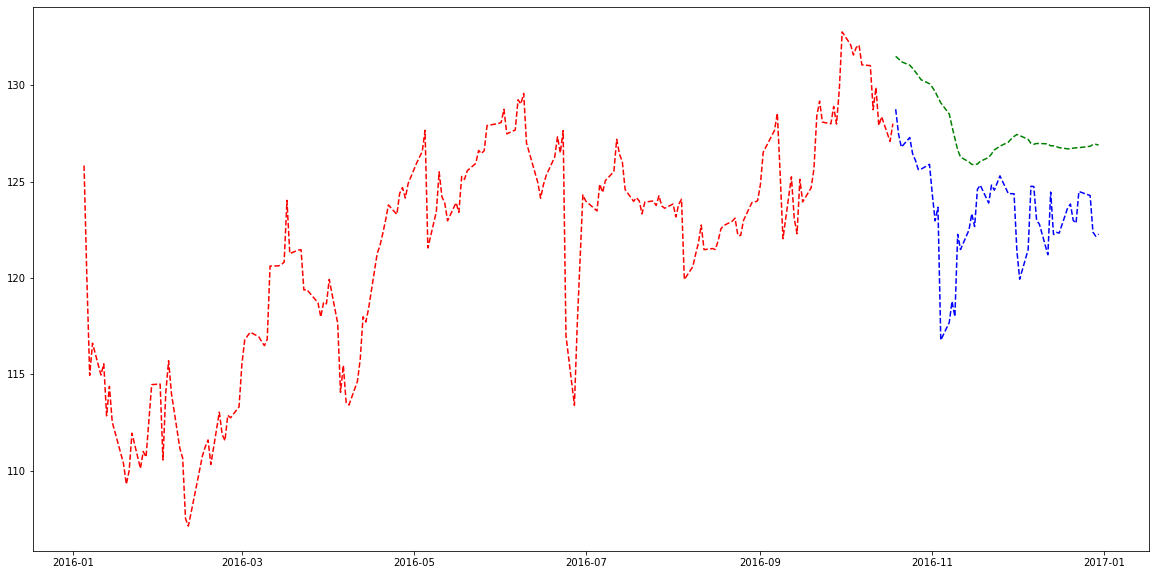

In [91]:
#for plotting
train = new_df[:200]
valid = new_df[200:]
valid['Predictions'] = closing_price
plt.plot(train['close'], 'r--')
plt.plot(valid['close'], 'b--')
plt.plot(valid['Predictions'], 'g--')

The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs.